In [1]:
import sys
import os
sys.path.append('..')

In [2]:
from src.dataset import ImageDataLoader
from src import config 
from src.utils import (
    get_balanced_dataset_sampler, 
    get_train_transform, 
    get_test_transform,
    valid_epoch,
    load_checkpoint
    )
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import DataLoader, Subset
import torch
from src.metrics import Metrics
from pathlib import Path
from src.model import Net
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay

In [3]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
def classify_all_dataset(model_path, data_path, class_map):

    model = Net(net_version="b0", num_classes=2).to(DEVICE)

    checkpoint = torch.load(model_path)
    model.load_state_dict(checkpoint['state_dict'])
    data_loader = ImageDataLoader(data_path)
    data_loader.transform =  get_test_transform()
    global_loader = DataLoader(data_loader.dataset, batch_size=180, num_workers=0, shuffle=False )
    _, _, result = valid_epoch(loader=global_loader , model=model)

    classes, values =np.unique(global_loader.dataset.targets, return_counts=True)
    labels = [class_map[res] for res in classes]
    fig = plt.figure(figsize = (4, 3))
    # creating the bar plot
    plt.bar(labels, values,
            width = 0.4, )
    
    plt.xlabel("Class")
    plt.ylabel("quantity")
    plt.title("Data set distribution")
    for index, value in enumerate(values):
        plt.text(index,value+0.01, str(value))
    plt.show()



    res = {
        'accuracy': result.accuracy,
        'precision': result.precision,
        'recall': result.recall,
        'fscore': result.fscore,
        'kappa': result.kappa,
        } 
    print(res)
    metrics = list(res.keys())
    values = list(res.values())
    
    fig = plt.figure(figsize = (10, 5))
    
    # creating the bar plot
    plt.bar(metrics, values,
            width = 0.4, )
    
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.title("All data set classification")
    for index, value in enumerate(values):
        plt.text(index,value+0.01, str(round(value*100, 2)))
    plt.show()


    cf_matrix= confusion_matrix(result.y_true, result.y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, 
                                display_labels=labels)
    disp.plot()
    disp.ax_.set_xticklabels(labels, rotation=12);



# Best Hypercellurarity Binary model

Loaded pretrained weights for efficientnet-b0


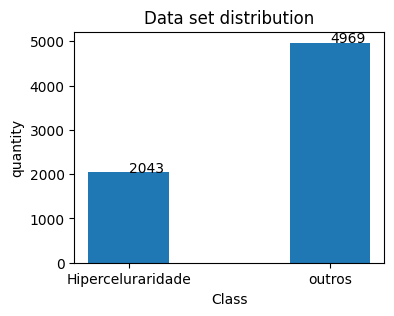

{'accuracy': 0.9847404449515117, 'precision': 0.9847198486034499, 'recall': 0.9847404449515117, 'fscore': 0.9847260601566692, 'kappa': 0.9629769039642945}


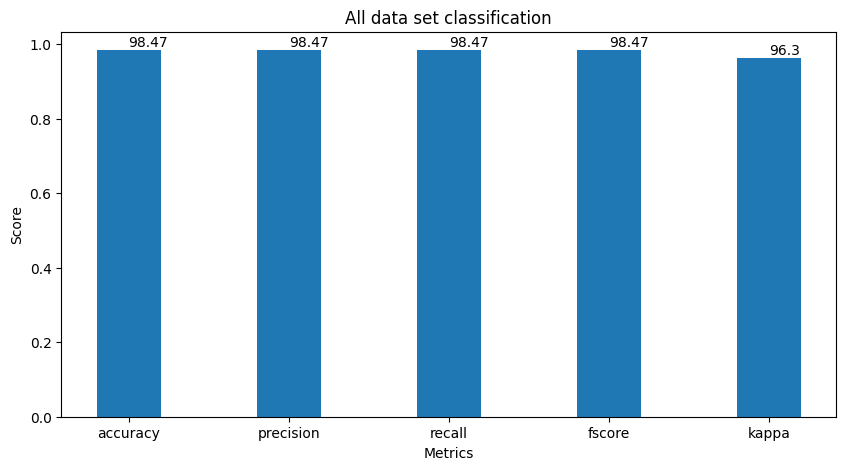

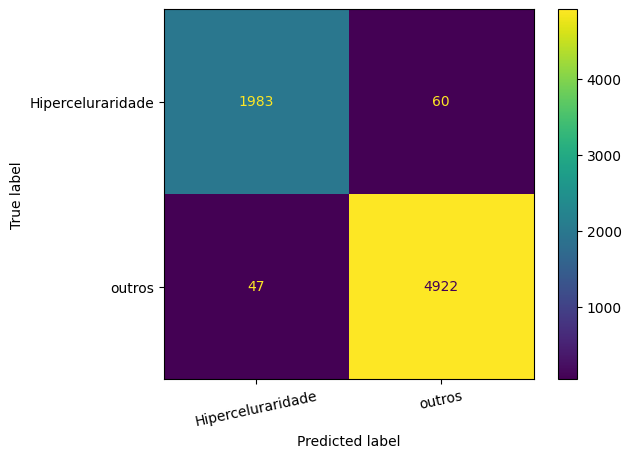

In [5]:
class_map = {0: 'Hiperceluraridade', 1: 'outros'}
model_path = '../artifacts/hiper_others_2023-05-12-18-06-48/4_fold_max_acc_checkpoint.pth.tar'
data_path = 'C:/Users/Maods/Documents/Development/Mestrado/terumo/apps/terumo-model-binary-glomerulus-hypercellularity/data/binary/hiper_others/'
classify_all_dataset(model_path, data_path, class_map)

# Best Membranous Binary model

Loaded pretrained weights for efficientnet-b0


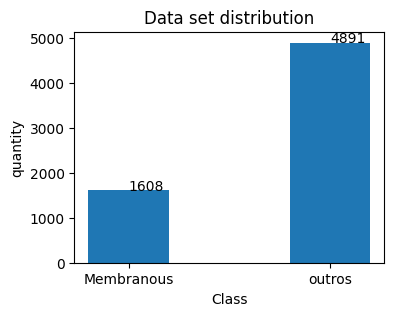

{'accuracy': 0.9829204492998923, 'precision': 0.9829102948398721, 'recall': 0.9829204492998923, 'fscore': 0.9829150938778707, 'kappa': 0.9541089672279975}


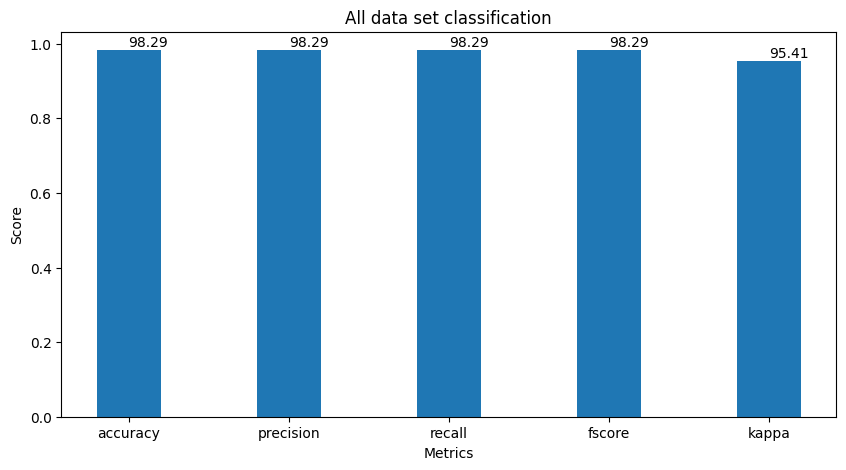

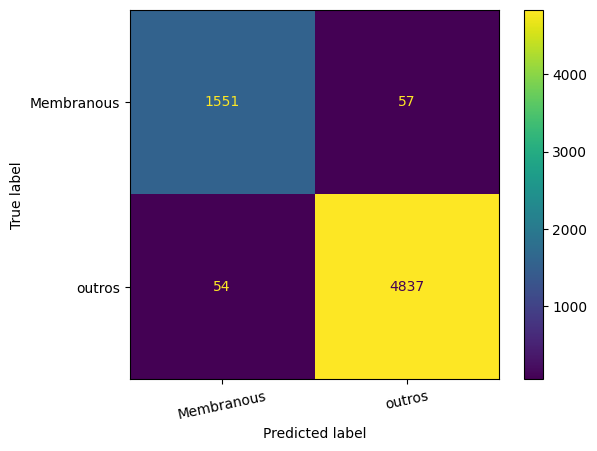

In [6]:
class_map = {0: 'Membranous', 1: 'outros'}
model_path = '../artifacts/membran_others_2023-05-12-20-31-18/0_fold_max_acc_checkpoint.pth.tar'
data_path = 'C:/Users/Maods/Documents/Development/Mestrado/terumo/apps/terumo-model-binary-glomerulus-hypercellularity/data/binary/membran_others/'
classify_all_dataset(model_path, data_path, class_map)

# Best sclerosis Binary model

Loaded pretrained weights for efficientnet-b0


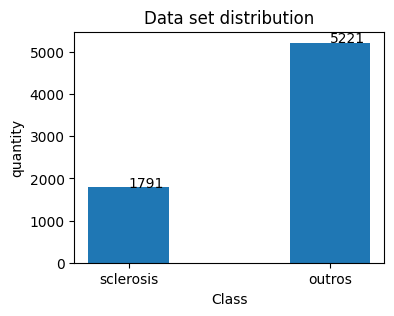

{'accuracy': 0.9771819737592699, 'precision': 0.9771905415527061, 'recall': 0.9771819737592699, 'fscore': 0.9771861547613584, 'kappa': 0.940031478769897}


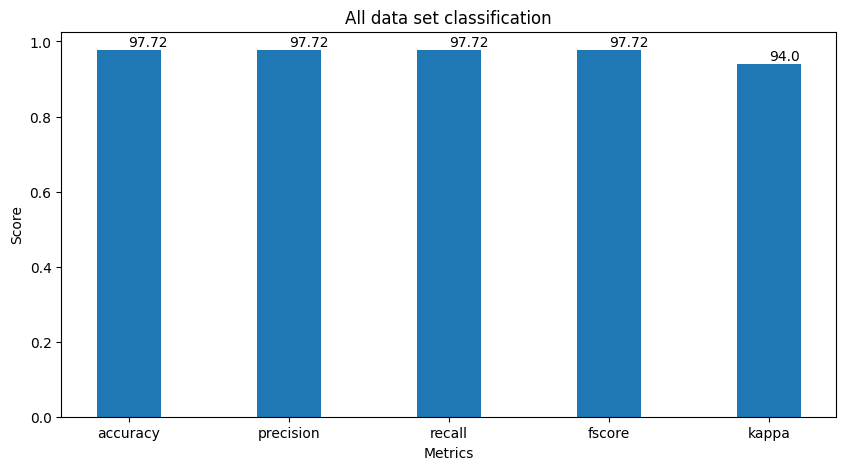

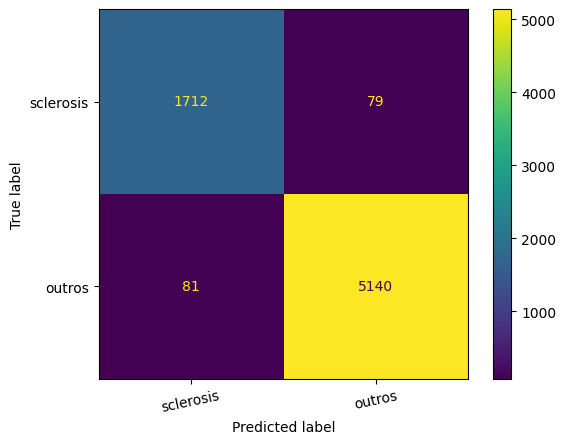

In [7]:
class_map = {0: 'sclerosis', 1: 'outros'}
model_path = '../artifacts/sclero_others_2023-05-12-13-27-54/4_fold_max_acc_checkpoint.pth.tar'
data_path = 'C:/Users/Maods/Documents/Development/Mestrado/terumo/apps/terumo-model-binary-glomerulus-hypercellularity/data/binary/sclero_others/'
classify_all_dataset(model_path, data_path, class_map)

# Best Normal Binary model

Loaded pretrained weights for efficientnet-b0


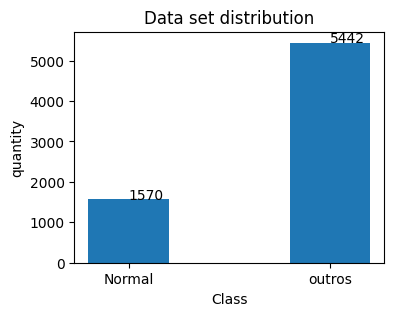

{'accuracy': 0.987592698231603, 'precision': 0.9877205562938361, 'recall': 0.987592698231603, 'fscore': 0.9876328952333375, 'kappa': 0.9645326720064594}


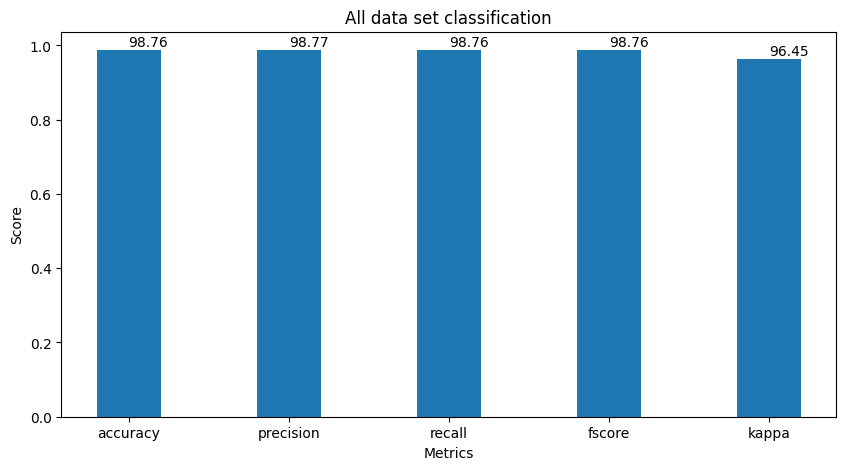

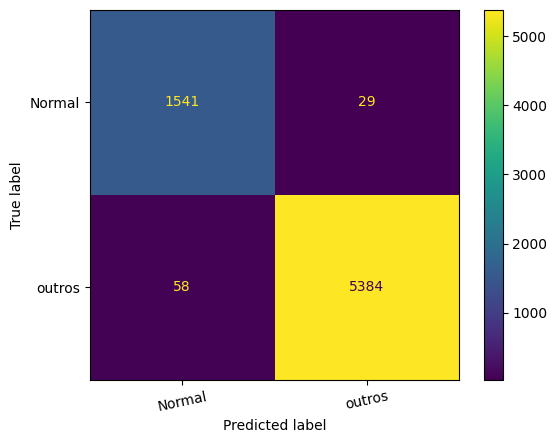

In [8]:
class_map = {0: 'Normal', 1: 'outros'}
model_path = '../artifacts/normal_others_2023-05-12-15-45-47/4_fold_max_acc_checkpoint.pth.tar'
data_path = 'C:/Users/Maods/Documents/Development/Mestrado/terumo/apps/terumo-model-binary-glomerulus-hypercellularity/data/binary/normal_others/'
classify_all_dataset(model_path, data_path, class_map)